<a href="https://colab.research.google.com/github/EarlDyor/EarlDyor.github.io/blob/main/%E8%80%81%E5%B8%AB%E7%9A%84%E7%AF%84%E4%BE%8B%E3%80%8C5DR_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import date
from functools import reduce

In [ ]:
Closeprice = pd.DataFrame()
Volume = pd.DataFrame()

tickers = ['2330.TW','1101.TW','1216.TW','1301.TW','1303.TW','1326.TW','1402.TW'
          ,'1590.TW','1605.TW','2002.TW','2207.TW','2303.TW','2308.TW','2317.TW'
          ,'2327.TW','2357.TW','2379.TW','2382.TW','2395.TW','2408.TW','2412.TW'
          ,'2454.TW','2603.TW','2609.TW','2615.TW','2801.TW','2880.TW','2881.TW'
          ,'2882.TW','2883.TW','2884.TW','2885.TW','2886.TW','2887.TW','2890.TW'
          ,'2891.TW','2892.TW','2912.TW','3008.TW','3034.TW','3037.TW','3045.TW'
          ,'3711.TW','4904.TW','4938.TW','5871.TW','5876.TW','5880.TW','6505.TW','9910.TW',]
for i in tickers:
        tmp = yf.download(i,'2019-01-01','2023-06-21')
        Closeprice[i] = tmp['Adj Close']
        Volume[i] = tmp['Volume']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
Closeprice.head()

,2330.TW,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1402.TW,1590.TW,1605.TW,2002.TW,...,3037.TW,3045.TW,3711.TW,4904.TW,4938.TW,5871.TW,5876.TW,5880.TW,6505.TW,9910.TW
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,193.747620,22.663019,58.994225,75.770561,55.974239,80.438583,22.965452,285.776855,13.377485,20.094625,...,21.469339,86.148911,43.844791,57.334663,36.235294,73.700203,33.724751,13.525184,90.146797,129.637421
2019-01-03,190.216888,22.439581,58.303223,74.528427,56.204269,80.680634,23.088264,278.156158,13.297379,20.220217,...,22.491688,85.746338,43.456783,57.255478,35.802204,72.873802,33.724751,13.602032,91.022018,131.711639
2019-01-04,183.596832,22.631100,58.648724,73.984993,56.050907,80.519279,23.129200,273.869507,12.896856,20.262081,...,22.212862,85.746338,42.835972,57.255478,35.008202,73.625084,33.682705,13.563607,91.459618,133.785858
2019-01-07,188.010193,22.982218,60.808102,77.245598,57.584457,84.311264,23.497627,290.063538,13.377485,20.471401,...,22.398745,86.954033,42.680767,58.364147,35.008202,74.902252,33.808853,13.602032,95.398079,136.205734
2019-01-08,186.244858,22.694941,60.635349,79.186447,56.894360,86.328285,23.620438,278.156158,13.337432,20.513264,...,22.724039,86.551460,42.835972,57.889004,34.214203,75.503265,33.598598,13.678880,94.085251,136.205734


In [ ]:
returns = np.log(Closeprice / Closeprice.shift(1))

# Initialize a new dataframe to store the boolean values
condition_df = pd.DataFrame(index=returns.index, columns=returns.columns)

# Check the condition for each stock column and date
for col in returns.columns:
    for i in range(2, len(returns)):
        if returns.loc[returns.index[i-1], col] > 0 and returns.loc[returns.index[i-2], col] > 0 and returns.loc[returns.index[i-3], col] > 0:
            condition_df.loc[returns.index[i], col] = returns.loc[returns.index[i], col]
        elif returns.loc[returns.index[i-1], col] < 0 and returns.loc[returns.index[i-2], col] < 0 and returns.loc[returns.index[i-3], col] < 0:
            condition_df.loc[returns.index[i], col] = returns.loc[returns.index[i], col]
        else:
            condition_df.loc[returns.index[i], col] = False
condition_df.head()

,2330.TW,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1402.TW,1590.TW,1605.TW,2002.TW,...,3037.TW,3045.TW,3711.TW,4904.TW,4938.TW,5871.TW,5876.TW,5880.TW,6505.TW,9910.TW
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-08,False,False,False,False,False,False,0.005213,False,False,0.002043,...,False,False,0.00363,False,False,False,False,False,-0.013857,0.0


In [ ]:
condition_df['total_return'] = condition_df.loc[:, condition_df.columns != 'total_return'].apply(lambda row: row[row != False].mean(), axis=1)
condition_df.head()

,2330.TW,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1402.TW,1590.TW,1605.TW,2002.TW,...,3045.TW,3711.TW,4904.TW,4938.TW,5871.TW,5876.TW,5880.TW,6505.TW,9910.TW,total_return
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,NaN
2019-01-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,NaN
2019-01-08,False,False,False,False,False,False,0.005213,False,False,0.002043,...,False,0.00363,False,False,False,False,False,-0.013857,0.0,0.002996


In [ ]:
condition_df.loc[condition_df.index[0], 'nv'] = 100

# Iterate over the rows in condition_df
for i in range(len(condition_df) - 1):
    if pd.notnull(condition_df.loc[condition_df.index[i+1], 'total_return']):
        condition_df.loc[condition_df.index[i+1], 'nv'] = condition_df.loc[condition_df.index[i], 'nv'] * (1 + condition_df.loc[condition_df.index[i+1], 'total_return'])
    else:
        condition_df.loc[condition_df.index[i+1], 'nv'] = condition_df.loc[condition_df.index[i], 'nv']
condition_df

,2330.TW,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1402.TW,1590.TW,1605.TW,2002.TW,...,3711.TW,4904.TW,4938.TW,5871.TW,5876.TW,5880.TW,6505.TW,9910.TW,total_return,nv
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
2019-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,NaN,100.000000
2019-01-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,NaN,100.000000
2019-01-08,False,False,False,False,False,False,0.005213,False,False,0.002043,...,0.00363,False,False,False,False,False,-0.013857,0.0,0.002996,100.299644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-14,-0.005072,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.007534,234.566869
2023-06-15,False,False,False,False,False,False,False,0.014185,False,False,...,False,False,False,False,False,False,False,False,0.008664,236.599195
2023-06-16,False,False,False,False,False,False,-0.001516,-0.033416,0.02814,False,...,False,False,False,False,False,False,False,False,0.003129,237.339418


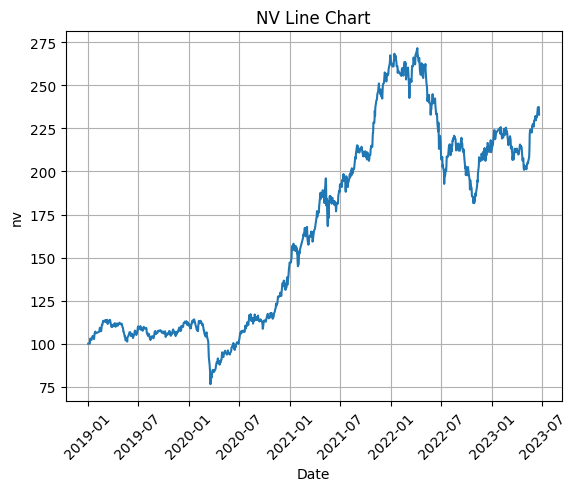

In [ ]:
plt.plot(condition_df.index, condition_df['nv'])
plt.xlabel('Date')
plt.ylabel('nv')
plt.title('NV Line Chart')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()